In [2]:
import pandas as pd

titanic = pd.read_csv('day4_data/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- 'PassengerId': 승객번호 
- 'Survived': 생존여부(0=사망, 1=생존) 
- 'Pclass': 객실등급(1,2,3) 
- 'Name': 승객 이름 
- 'Sex': 성별, 'Age':나이
- 'SibSp': 동승한 형제와 배우자 수
- 'Parch': 동승한 부모, 아이의 수
- 'Ticket': 티켓번호
- 'Fare': 요금
- 'Cabin': 객실번호
- 'Embarked': 탑승항구('S','C', 'Q')

### 결측치
- 결측치 데이터 : 삭제, 다른값 대체

In [8]:
# 결측치 데이터 확인하기

titanic.isnull().sum() # null값이 있는지 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# 결측데이터가 너무 많은 경우 데이터분석에 어려움이 있기 때문에 삭제한다
# 결측데이터 삭제, Cabin column 삭제

# titanic.drop('Cabin', axis=1)
titanic.drop('Cabin', axis=1, inplace=True)


In [15]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [16]:
# 결측데이터 최빈값으로 대체하기

titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
titanic['Embarked'].fillna('S', inplace=True)

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [21]:
# 결측데이터 평균값으로 대체
# 나이 열 대체

titanic['Age'].mean()

np.float64(29.69911764705882)

In [23]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

C:\Users\B8-07\AppData\Local\Temp\ipykernel_9848\1013071036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


In [25]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 데이터 그룹핑
- 항구별 객실등급 갯수 출력
- 객실 등급별, 성별, 나이, 요금의 평균 구하

In [34]:
dataEmbarked = titanic.groupby('Embarked', as_index=False)[['Pclass']].count()
dataEmbarked

,Embarked,Pclass
0,C,168
1,Q,77
2,S,646


In [33]:
# 객실 등급별, 성별, 나이, 요금의 평균 계산

titanic.groupby(['Embarked', 'Sex'], as_index=False)[['Fare', 'Age']].mean().sort_values('Fare', ascending=False)


,Embarked,Sex,Fare,Age
0,C,female,75.169805,28.566978
1,C,male,48.262109,32.095759
4,S,female,39.143456,28.148220
5,S,male,21.711996,30.193391
3,Q,male,13.838922,30.182389
2,Q,female,12.634958,27.896634


In [35]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Embarked'>

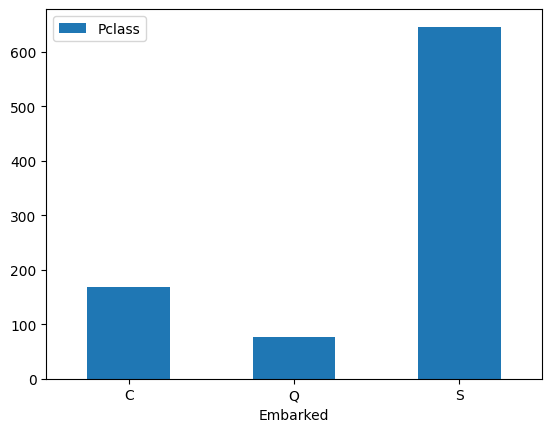

In [41]:
# pandas를 이용한 시각화
# df.plot(x,y)

dataEmbarked.plot(kind='bar', x='Embarked', rot=0)

<Axes: xlabel='Sex'>

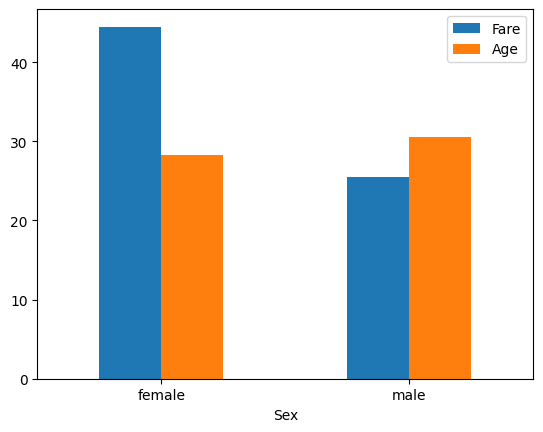

In [43]:
dataSex = titanic.groupby(['Sex'], as_index=False)[['Fare', 'Age']].mean().sort_values('Fare', ascending=False)

dataSex.plot(kind='bar', x='Sex', rot=0)

### # 객실 등급별 생존여부 그래프 작성

In [45]:
# 1. 시각화 라이브러리 불러오기

import matplotlib.pyplot as plt

In [59]:
# 2. 표시할 데이터셋 설정

data0 = titanic.query('Survived==0').groupby('Pclass')[['Name']].count()
print(data0)
data1 = titanic.query('Survived==1').groupby('Pclass')[['Name']].count()
print(data1)

dataSurvived = pd.merge(data0, data1, on='Pclass')
dataSurvived.columns=['사망', '생존']

        Name
Pclass      
1         80
2         97
3        372
        Name
Pclass      
1        136
2         87
3        119


In [60]:
dataSurvived

,사망,생존
Pclass,,
1,80,136
2,97,87
3,372,119


In [75]:
# 한글 코드 불러오기

plt.rcParams['font.family'] = 'Malgun Gothic'

<function matplotlib.pyplot.show(close=None, block=None)>

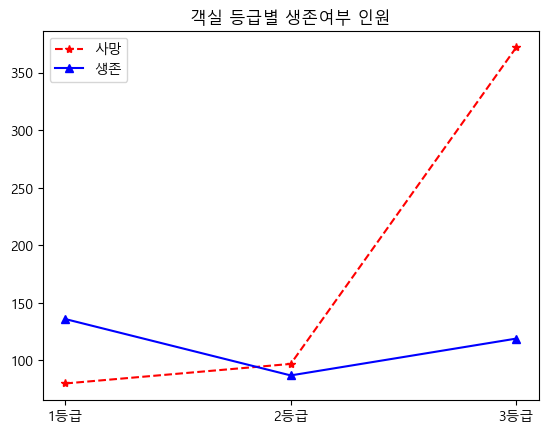

In [79]:
# 3. plot()에 데이터 입력

plt.plot(dataSurvived.index, dataSurvived['사망'], marker='*', linestyle='--', color='red', label='사망')
plt.plot(dataSurvived.index, dataSurvived['생존'], marker='^', linestyle='-', color='blue', label='생존')
plt.title('객실 등급별 생존여부 인원')
plt.xticks(dataSurvived.index, ['1등급', '2등급', '3등급'])
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

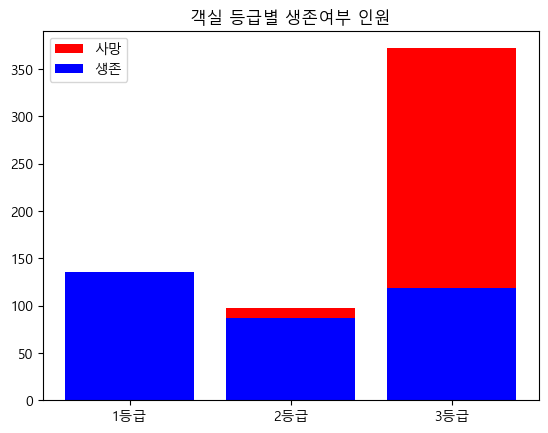

In [80]:
# 막대그래프로 표시

plt.bar(dataSurvived.index, dataSurvived['사망'], color='red', label='사망')
plt.bar(dataSurvived.index, dataSurvived['생존'], color='blue', label='생존')
plt.title('객실 등급별 생존여부 인원')
plt.xticks(dataSurvived.index, ['1등급', '2등급', '3등급'])
plt.legend()
plt.show